In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, fci


In [32]:
# Set the range of distances r (in Å) — take 10 points
distances = np.linspace(0.2, 2.5, 20) 

# basis sets
basis_sets = ['sto-3g', 'dz']

# Create a dictionary to store FCI energies for each basis set at different distances
energy_dict = {basis: [] for basis in basis_sets}


In [33]:
# Main loop: calculate for each basis set and distance
for basis in basis_sets:  # Loop over the two basis sets, handle one basis per loop
    print(f"\n=== Basis set: {basis} ===")
    for r in distances:
        # Define the H2 molecule, with two hydrogen atoms along the z-axis
        mol = gto.Mole()  # Create a new molecule object using PySCF
        mol.atom = f'H 0 0 0; H 0 0 {r}'  # Set the atomic coordinates
        mol.basis = basis  # Specify the basis set used for the calculation
        mol.spin = 0  # Total spin = 0 
        mol.charge = 0  # Total charge = 0 
        mol.build()

        # Hartree-Fock self-consistent field (SCF) calculation
        mf = scf.RHF(mol)
        mf.kernel()

        # Full Configuration Interaction (FCI) calculation (exact diagonalization)
        cisolver = fci.FCI(mol, mf.mo_coeff)
        e_fci, _ = cisolver.kernel()
        energy_dict[basis].append(e_fci)

        print(f"r = {r:.2f} Å -> E_FCI = {e_fci:.6f} Hartree")



=== Basis set: sto-3g ===
converged SCF energy = 0.164175012061695
r = 0.20 Å -> E_FCI = 0.157482 Hartree
converged SCF energy = -0.682029406625666
r = 0.32 Å -> E_FCI = -0.690342 Hartree
converged SCF energy = -0.976487720155756
r = 0.44 Å -> E_FCI = -0.987205 Hartree
converged SCF energy = -1.08603824512993
r = 0.56 Å -> E_FCI = -1.100017 Hartree
converged SCF energy = -1.1166554039379
r = 0.68 Å -> E_FCI = -1.134865 Hartree
converged SCF energy = -1.11010002529611
r = 0.81 Å -> E_FCI = -1.133655 Hartree
converged SCF energy = -1.08563183012664
r = 0.93 Å -> E_FCI = -1.115853 Hartree
converged SCF energy = -1.05243600263994
r = 1.05 Å -> E_FCI = -1.090922 Hartree
converged SCF energy = -1.01514648441755
r = 1.17 Å -> E_FCI = -1.063790 Hartree
converged SCF energy = -0.976475042485523
r = 1.29 Å -> E_FCI = -1.037382 Hartree
converged SCF energy = -0.938201430791953
r = 1.41 Å -> E_FCI = -1.013526 Hartree
converged SCF energy = -0.901496623234603
r = 1.53 Å -> E_FCI = -0.993225 Hartre

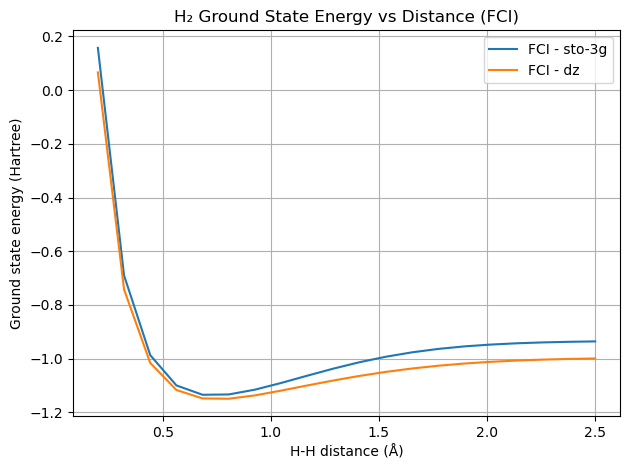

In [34]:
for basis in basis_sets:
    plt.plot(distances, energy_dict[basis], label=f'FCI - {basis}')

plt.xlabel('H-H distance (Å)')
plt.ylabel('Ground state energy (Hartree)')
plt.title('H₂ Ground State Energy vs Distance (FCI)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()